# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**


In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
# ! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
df = pd.read_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df=df.dropna()

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
# Examine X dimension
X.shape

(282, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(282, 154)

In [7]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [8]:
# Defines and builds the lazyclassifier

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:29<00:00,  1.43it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:25<00:00,  1.62it/s]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.85,0.95,0.36,0.10
ExtraTreeRegressor,0.85,0.95,0.36,0.03
ExtraTreesRegressor,0.85,0.95,0.36,0.53
GaussianProcessRegressor,0.85,0.95,0.36,0.10
XGBRegressor,0.85,0.95,0.36,0.31
MLPRegressor,0.72,0.91,0.48,1.35
RandomForestRegressor,0.69,0.90,0.51,0.49
GradientBoostingRegressor,0.68,0.90,0.52,0.30
BaggingRegressor,0.65,0.89,0.54,0.10


In [10]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,10208725092903837031473775659322936847292343637...,-1786526891258171589398268155081822256556034514...,24402494854414095867774500864.00,0.13
LinearRegression,1816799132658209803730944.00,-3179398482151867223638016.00,3255381808816.00,0.04
TransformedTargetRegressor,1816799132658209803730944.00,-3179398482151867223638016.00,3255381808816.00,0.04
RANSACRegressor,63054768146501947359232.00,-110345844256378409975808.00,606467373638.90,1.77
LarsCV,13.97,-21.70,8.70,0.53
KernelRidge,7.24,-9.92,6.03,0.03
GaussianProcessRegressor,4.15,-4.51,4.28,0.05
QuantileRegressor,1.67,-0.17,1.98,1.49
DummyRegressor,1.60,-0.05,1.87,0.03


## **5. Data visualization of model performance**

[(0.0, 1.0)]

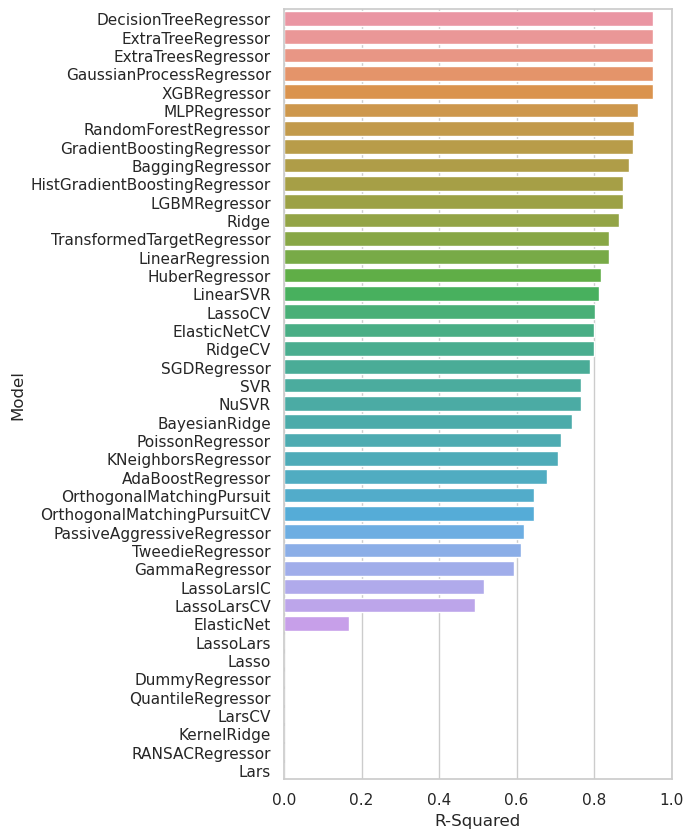

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

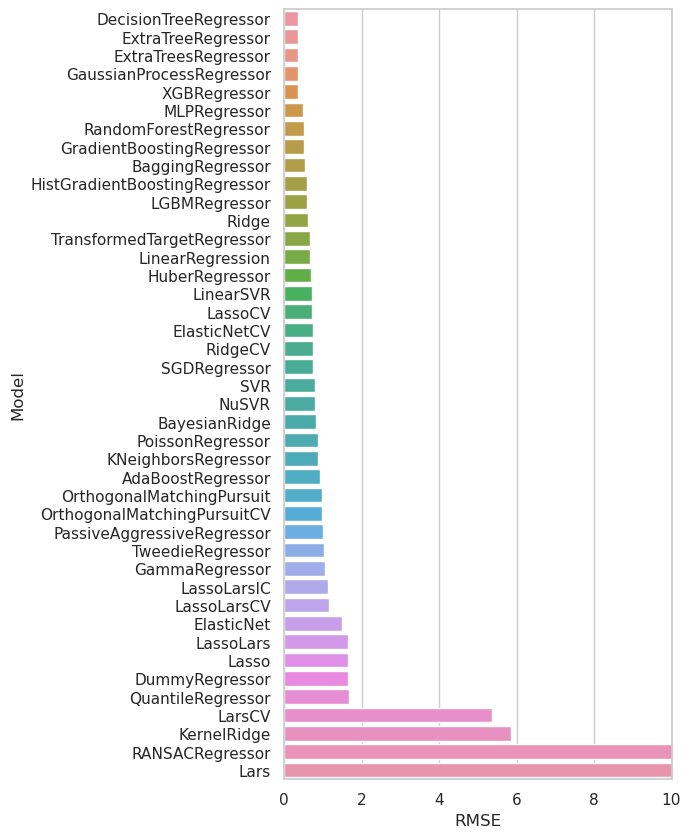

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

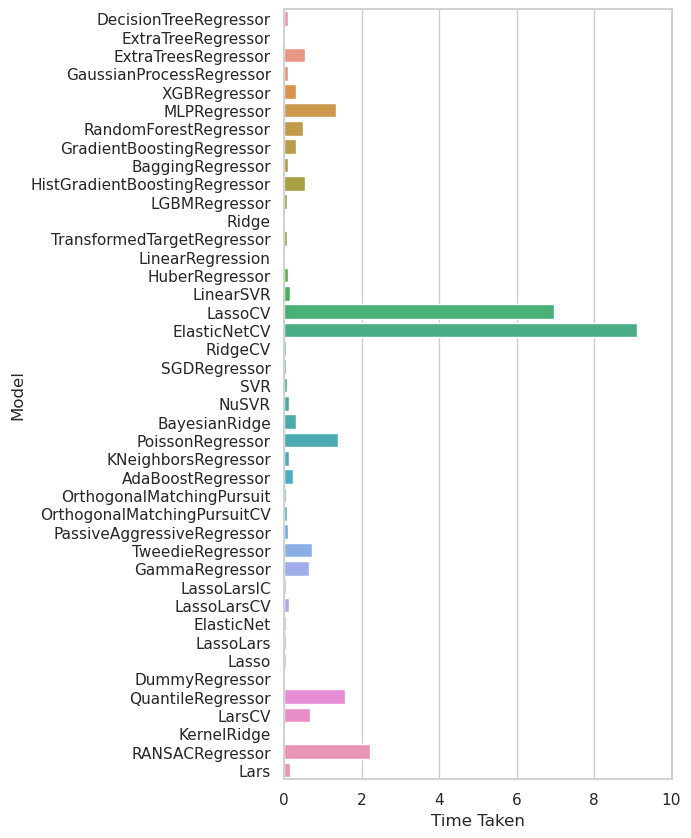

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))